<a href="https://colab.research.google.com/github/pmehta-2011/clustering/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
# Load the Wine dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

In [5]:

# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

In [6]:
# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [8]:
#Perform K-Means Clustering and display metrics with optional plotting
def kmeans_clustering(X, n_clusters=3, title="K-Means Clustering"):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(X)

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Evaluation metrics
    silhouette_avg = silhouette_score(X, clusters)
    calinski_harabasz = calinski_harabasz_score(X, clusters)
    davies_bouldin = davies_bouldin_score(X, clusters)

    # Print metrics summary
    print(f"\n{title} (n_clusters={n_clusters})")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

    return silhouette_avg, calinski_harabasz, davies_bouldin


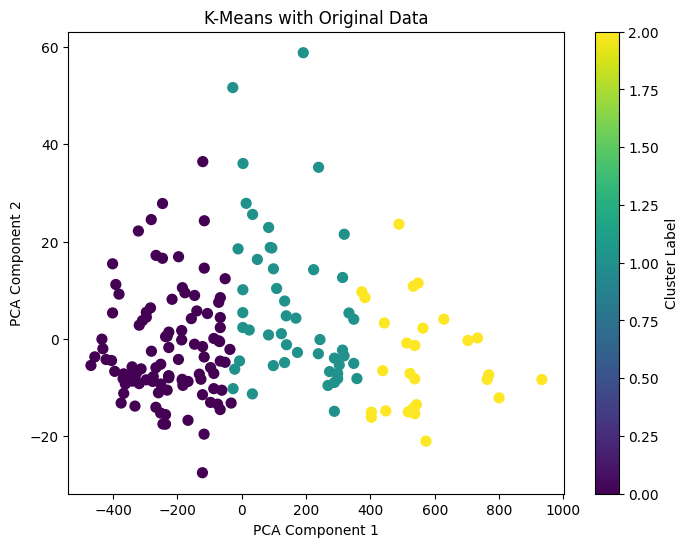


K-Means with Original Data (n_clusters=3)
Silhouette Score: 0.5603
Calinski-Harabasz Score: 497.5735
Davies-Bouldin Score: 0.5487



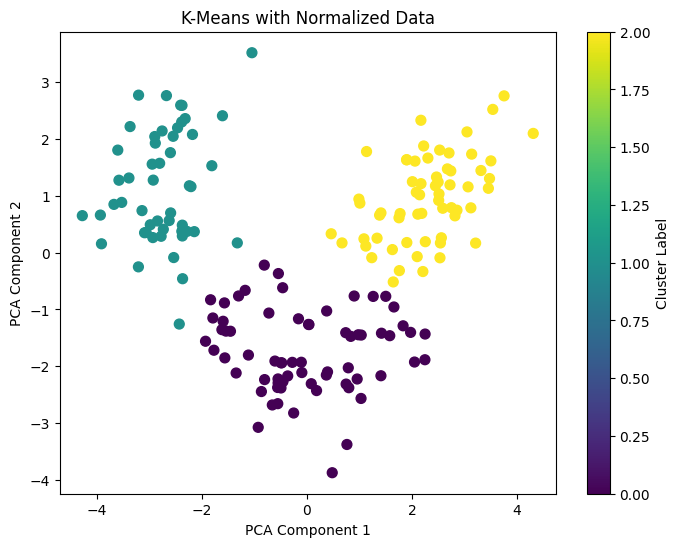


K-Means with Normalized Data (n_clusters=3)
Silhouette Score: 0.5602
Calinski-Harabasz Score: 343.9492
Davies-Bouldin Score: 0.5977



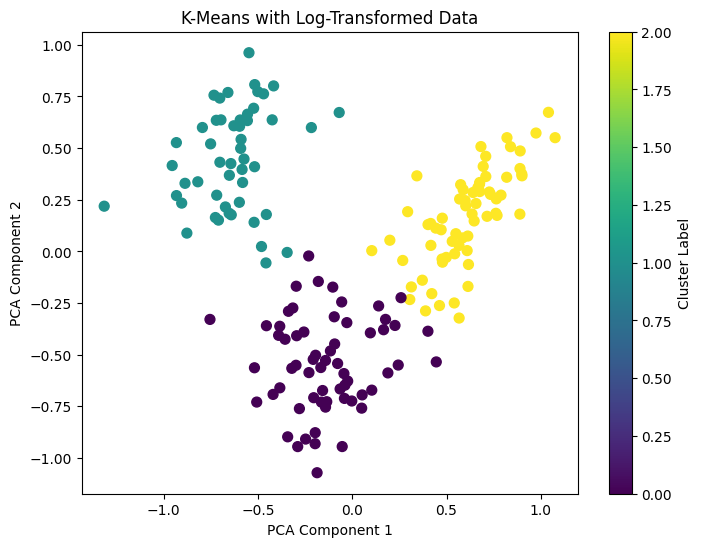


K-Means with Log-Transformed Data (n_clusters=3)
Silhouette Score: 0.6021
Calinski-Harabasz Score: 383.3671
Davies-Bouldin Score: 0.5235



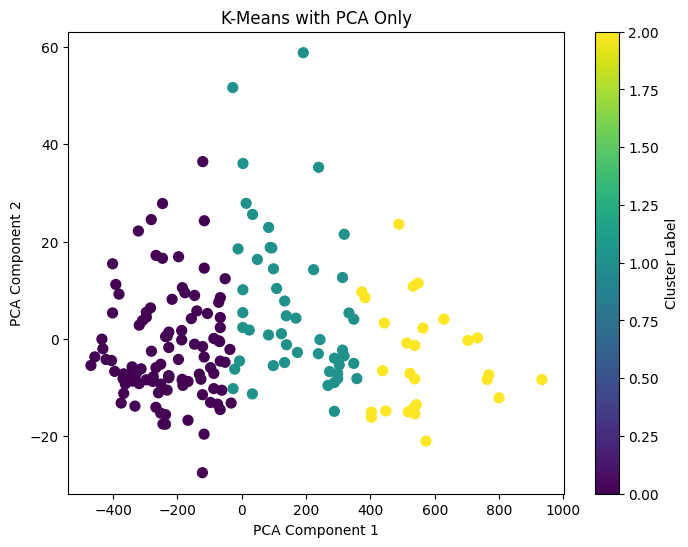


K-Means with PCA Only (n_clusters=3)
Silhouette Score: 0.5603
Calinski-Harabasz Score: 497.5735
Davies-Bouldin Score: 0.5487



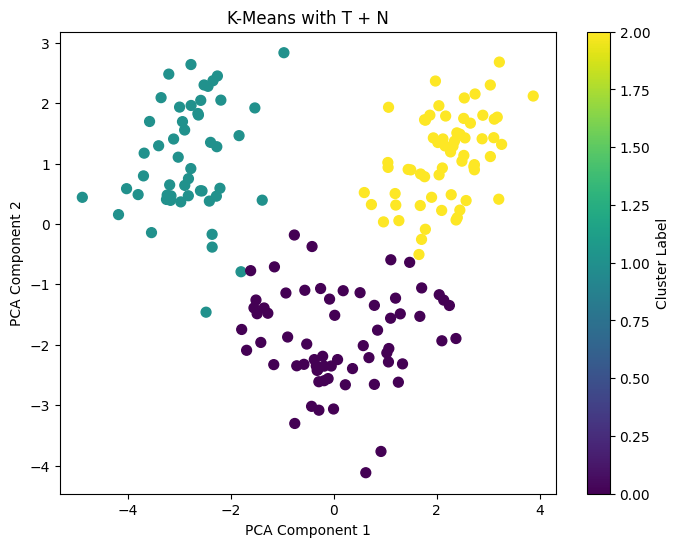


K-Means with T + N (n_clusters=3)
Silhouette Score: 0.5857
Calinski-Harabasz Score: 377.2877
Davies-Bouldin Score: 0.5679



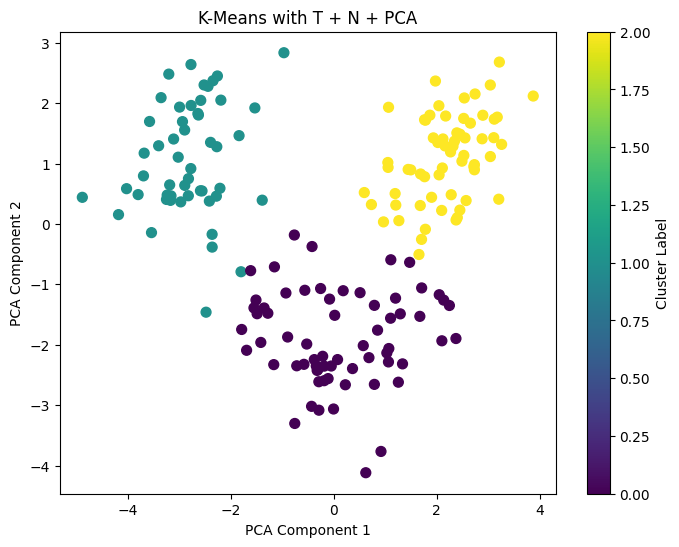


K-Means with T + N + PCA (n_clusters=3)
Silhouette Score: 0.5857
Calinski-Harabasz Score: 377.2877
Davies-Bouldin Score: 0.5679



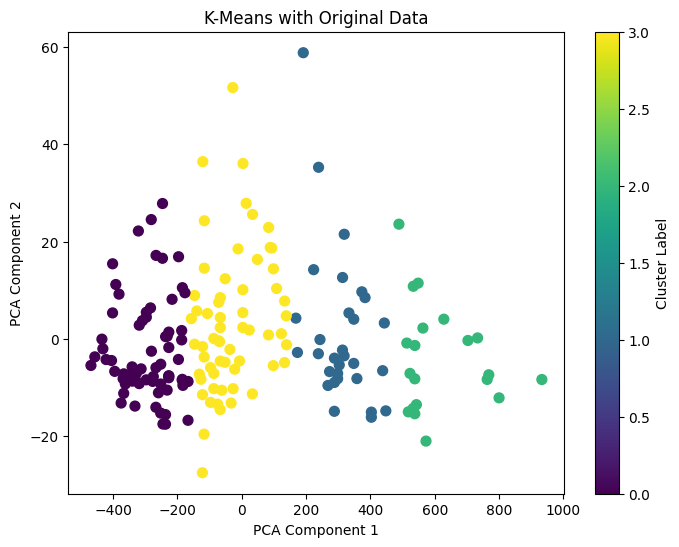


K-Means with Original Data (n_clusters=4)
Silhouette Score: 0.5682
Calinski-Harabasz Score: 698.3397
Davies-Bouldin Score: 0.5475



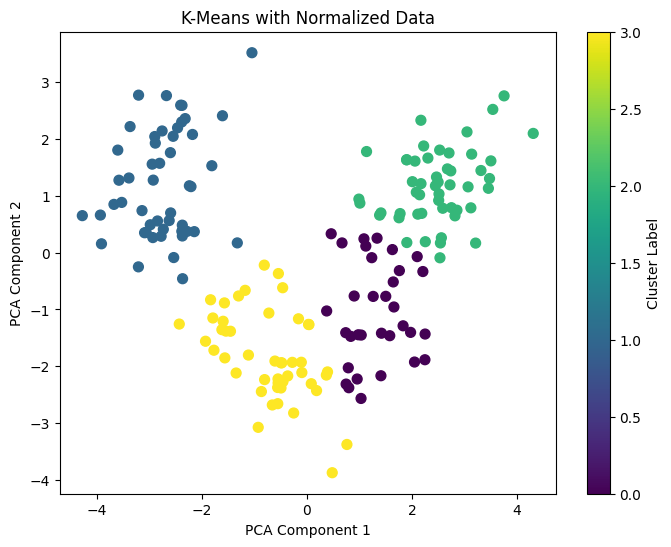


K-Means with Normalized Data (n_clusters=4)
Silhouette Score: 0.4914
Calinski-Harabasz Score: 328.5155
Davies-Bouldin Score: 0.7422



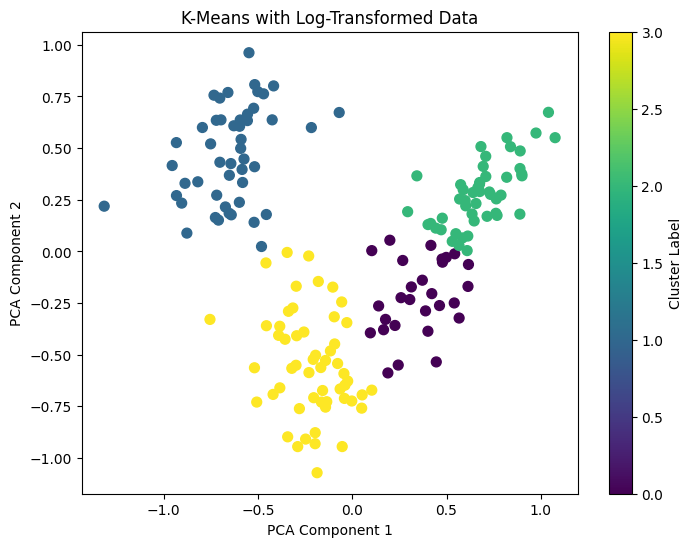


K-Means with Log-Transformed Data (n_clusters=4)
Silhouette Score: 0.5098
Calinski-Harabasz Score: 349.9487
Davies-Bouldin Score: 0.6580



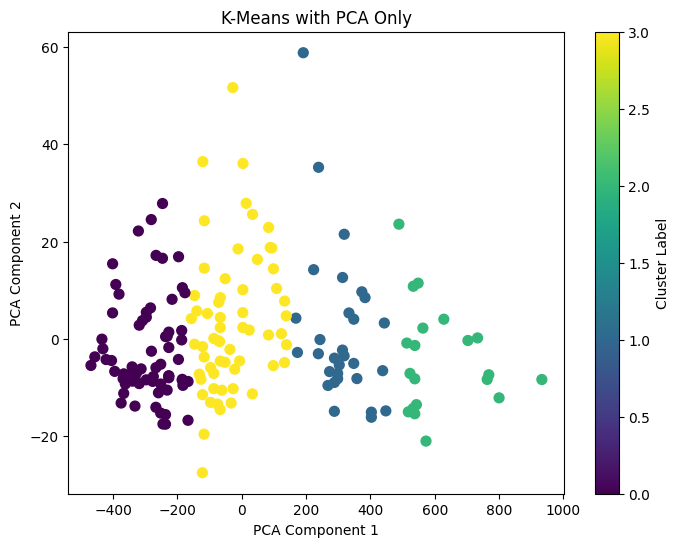


K-Means with PCA Only (n_clusters=4)
Silhouette Score: 0.5682
Calinski-Harabasz Score: 698.3397
Davies-Bouldin Score: 0.5475



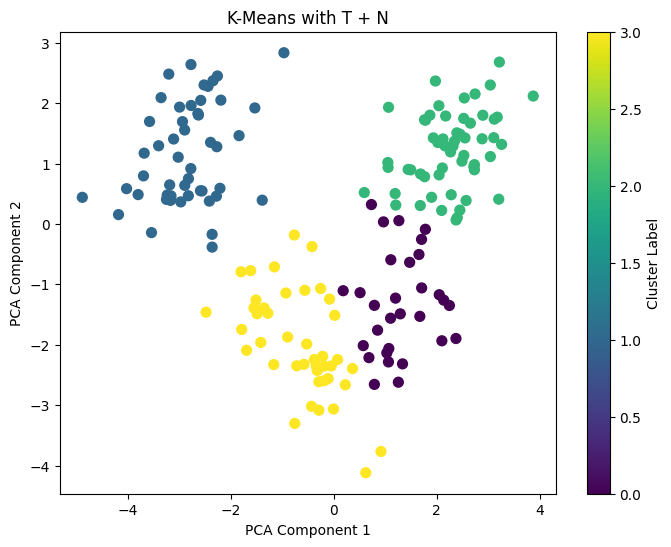


K-Means with T + N (n_clusters=4)
Silhouette Score: 0.5125
Calinski-Harabasz Score: 350.2871
Davies-Bouldin Score: 0.7472



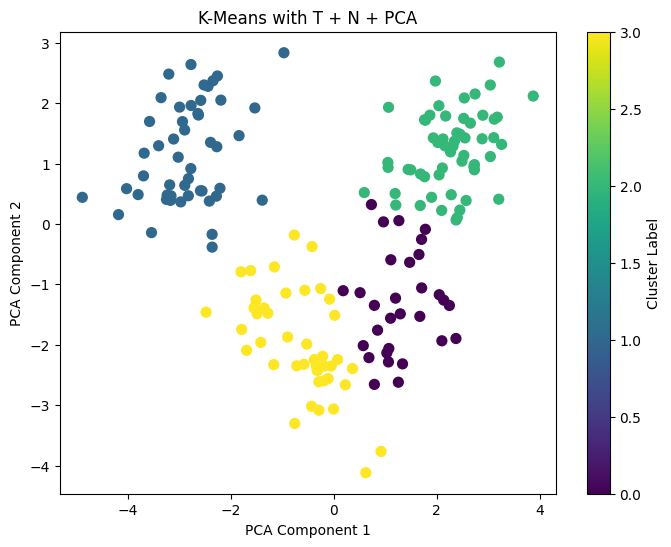


K-Means with T + N + PCA (n_clusters=4)
Silhouette Score: 0.5125
Calinski-Harabasz Score: 350.2871
Davies-Bouldin Score: 0.7472



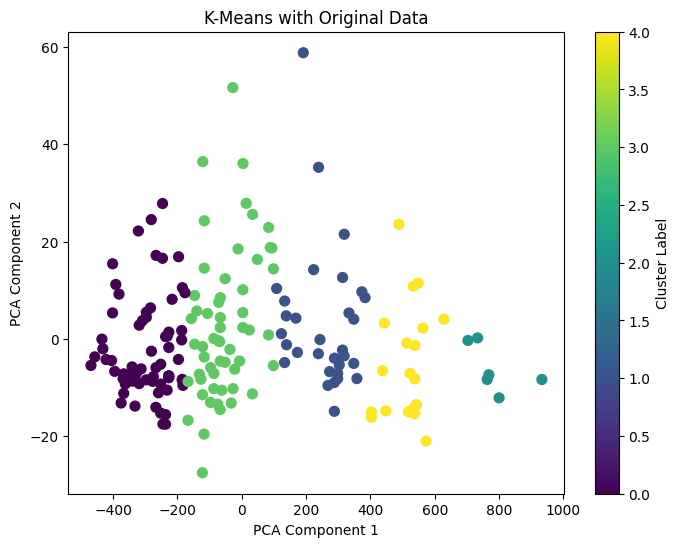


K-Means with Original Data (n_clusters=5)
Silhouette Score: 0.5655
Calinski-Harabasz Score: 705.3050
Davies-Bouldin Score: 0.4820



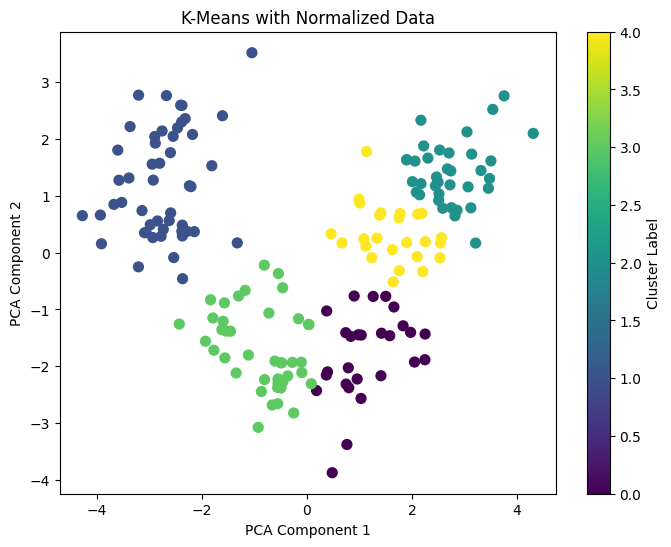


K-Means with Normalized Data (n_clusters=5)
Silhouette Score: 0.4499
Calinski-Harabasz Score: 305.4251
Davies-Bouldin Score: 0.8138



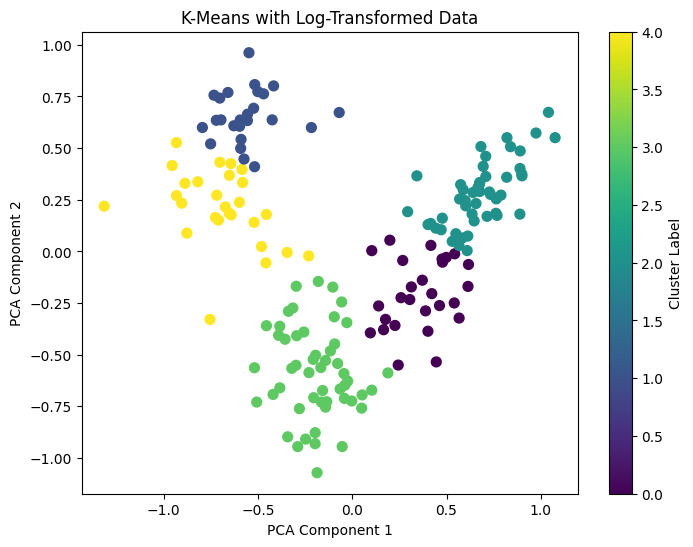


K-Means with Log-Transformed Data (n_clusters=5)
Silhouette Score: 0.4521
Calinski-Harabasz Score: 334.2931
Davies-Bouldin Score: 0.7602



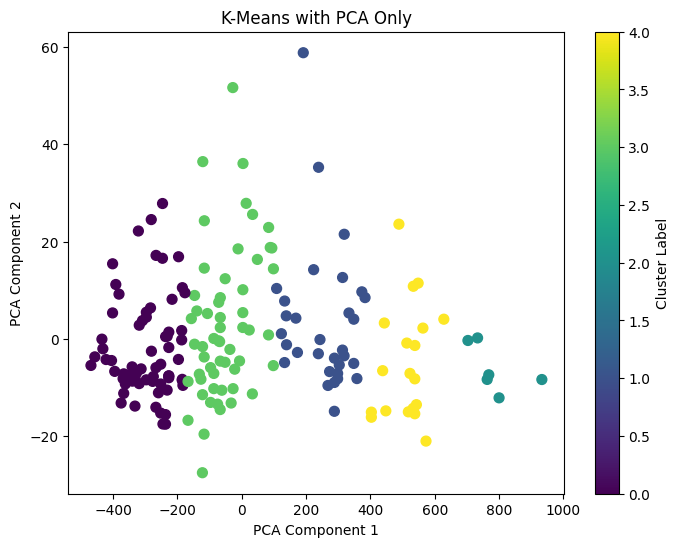


K-Means with PCA Only (n_clusters=5)
Silhouette Score: 0.5655
Calinski-Harabasz Score: 705.3050
Davies-Bouldin Score: 0.4820



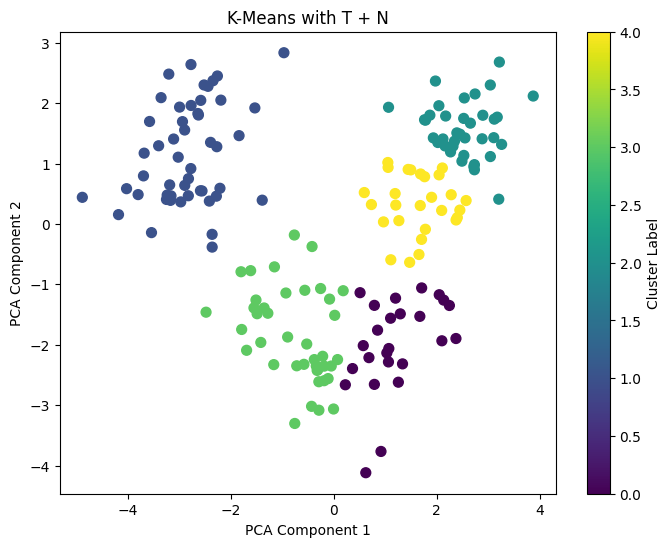


K-Means with T + N (n_clusters=5)
Silhouette Score: 0.4644
Calinski-Harabasz Score: 327.0208
Davies-Bouldin Score: 0.8078



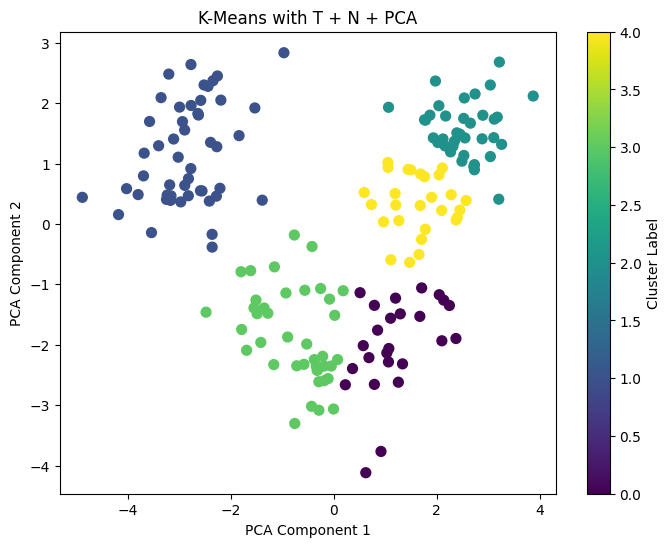


K-Means with T + N + PCA (n_clusters=5)
Silhouette Score: 0.4644
Calinski-Harabasz Score: 327.0208
Davies-Bouldin Score: 0.8078


Summary of Clustering Results:
                  Method  n_clusters  Silhouette Score  \
0          Original Data           3          0.560265   
1        Normalized Data           3          0.560170   
2   Log-Transformed Data           3          0.602085   
3               PCA Only           3          0.560265   
4                  T + N           3          0.585682   
5            T + N + PCA           3          0.585682   
6          Original Data           4          0.568246   
7        Normalized Data           4          0.491421   
8   Log-Transformed Data           4          0.509753   
9               PCA Only           4          0.568246   
10                 T + N           4          0.512529   
11           T + N + PCA           4          0.512529   
12         Original Data           5          0.565475   
13       Normalized Data  

In [9]:
# Run K-Means clustering for multiple preprocessing methods
def run_kmeans_clustering(X, cluster_values=[3, 4, 5]):
    # Store results for the table
    results = {
        "Method": [],
        "n_clusters": [],
        "Silhouette Score": [],
        "Calinski-Harabasz Score": [],
        "Davies-Bouldin Score": []
    }

    methods = [
        "Original Data",
        "Normalized Data",
        "Log-Transformed Data",
        "PCA Only",
        "T + N",
        "T + N + PCA"
    ]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run K-Means clustering, generate plot, and print metrics summary
            silhouette_avg, calinski_harabasz, davies_bouldin = kmeans_clustering(X_pca, n_clusters=n_clusters, title=f"K-Means with {method}")

            # Store results in the table
            results["Method"].append(method)
            results["n_clusters"].append(n_clusters)
            results["Silhouette Score"].append(silhouette_avg)
            results["Calinski-Harabasz Score"].append(calinski_harabasz)
            results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run K-Means clustering and generate plots with metric summaries and a final summary table
kmeans_results = run_kmeans_clustering(X, cluster_values=[3, 4, 5])
